In [1]:
# Lisa loves opera (very simple trained 3-neurotron network)

from neurotron import Token, Toy, Cells, Train

In [2]:
# To get help on classes Token, Toy, Cells, Train uncomment the appropriate line below:
#help(Token)
#help(Toy)
#help(Cells)
#help(Train)

In [3]:
# Create a Tokenizer

token = Token({'Lisa':[1,0,0], 'loves':[0,1,0], 'opera':[0,0,1]})
print(token)

{'Lisa': [1, 0, 0], 'loves': [0, 1, 0], 'opera': [0, 0, 1]}


In [4]:
# The Token class provides a method for decoding tokens

print(token.decode([1,0,0]))  # token for 'Lisa'
print(token.decode([0,1,0]))  # token for 'loves'
print(token.decode([0,0,1]))  # token for 'opera' 

Lisa
loves
opera


In [5]:
# if ambiguous patterns are presented to the decoder, the decoder returns a tuple of all 
# tokens which might be represented by the given pattern.

print(token.decode([0,1,1]))  # 'bit pattern union' of tokens 'loves' and 'opera' 

['loves', 'opera']


In [7]:
# Enough about tokens! Let's create a 1 x 3 cell cluster (3 neurotron cells)

m = 1  # number of cluster rows
n = 3  # number of cluster columns
d = 1  # number of detectors per terminal
s = 3  # number of synapses per detector

shape = (m,n,d,s)
cells = Cells(shape,token)

# we have eight (binary) states per cell:
# - U: stimulation state  (blue)
# - Q: excitation state   (violet)
# - D: depression state   (dark gray)
# - B: bursts state       (orange)
# - X: prediction state   (green)
# - Y: activation state   (red)
# - S: spiking state      (white)
# - L: learning state     (yellow)

# initially none of these states are activated

#print(cells)
cells
"""
File ~/Bluenetics/Git/Neural/neurotron-develop/neurotron/src/neurotron/cluster/cells.py:404, in Cells.__init__(self, shape, token, verbose, char)
    401 self.token = self._token_setup(token)
    402 m,n,d,s = shape
--> 404 f = [0,0,0] if self.token is None else self.token('.')
    405 self.y = nm.row(nm.zeros(1,m*n),f)
    406 self.record = Record(self)
"""

Exception: gave up after 100k trials

In [44]:
# States can be accessed as 1-dimensional arrays or 2-dimensional matrices
# E.g.: cells.X[i,j] = cells.X[k] with k = m*j + i
# Let us set some states:

    # cell [0] or [0,0]

cells.U[0,0] = 1     # cell [0] or [0,0]
cells.X[0] = 1
cells.Y[0] = 1
cells.S[0] = 1
cells.D[0] = 1

    # cell [1] or [0,1]

cells.Q[1] = 1     
cells.S[1] = 1

    # cell [2] or [0,2]

cells.U[2] = 1
cells.Q[2] = 1      # hides U state in the display
cells.X[2] = 1
cells.Y[2] = 1
cells.S[2] = 1
cells.L[2] = 1      # hides S state in the display
cells.D[2] = 1
cells.B[2] = 1      # hides D state in the display

# Let us display the cell cluster's states. 

print(cells)

|UXDYS|QS|UQXLDBYS|


AttributeError: 'int' object has no attribute 'list'

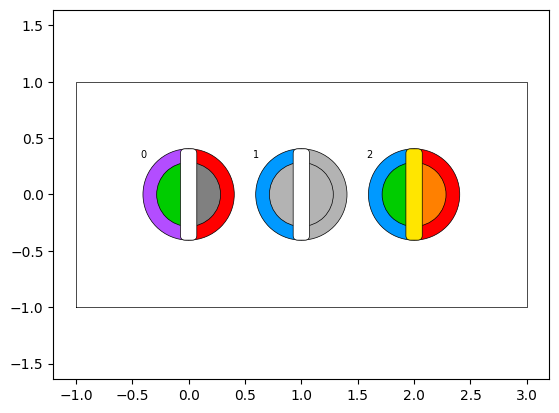

In [34]:
# Now Let us plot the cell cluster's states. 
# Only 5 states per cell are displayed (to present state info as compact as possible). 
# This means that states U,S,D might be potentially hidden when displayed, if states Q,L,B 
# are set (have logical value 1):
# - Q hides U
# - L hides S
# - B hides D
# mind: the state values are not actually over written, it is only a matter of (compact) plotting

cells.plot()

In [ ]:
#===========================================================================
# Secario 2: No predictive cells 
#===========================================================================
par,token = toy('sarah');  epar,cpar,ppar,dyn = par
epar.p[2] = epar.p[1] = epar.p[0]             # overwrite => all the same
ppar.P[2][0] = ppar.P[1][0] = ppar.P[0][0]    # overwrite => all the same

y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=0)

mon = Monitor(3,8,'Scenario 2: No Predictive Cells')
y = cells.iteration(y)
check(cells,'|U,U,UQB,UQBY,DY,D,D-|U,U,UQB,UQDBY,DY,D,D-|U,U,UQB,UQDBY,DY,D,D-|')

In [2]:
#===========================================================================
# Secario 3: some predictive cells 
#===========================================================================
par,token = toy('sarah');  epar,cpar,ppar,dyn = par
epar.p[2] = epar.p[1] = epar.p[0]             # overwrite => all the same
ppar.P[2][0] = ppar.P[1][0] = ppar.P[0][0]    # overwrite => all the same

y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=0)
cells[0].x.set(1)
cells[2].x.set(1)

mon = Monitor(3,8,'Scenario 3: Some Predictive Cells')
y = cells.iteration(y)
check(cells,'|UX,UXLY,UQXDY,UQXDY,XDY,XD,XD-|U,UD,UQD,UQD,D,D,D-|UX,UXLDY,UQXDY,UQXDY,XDY,XD,XD-|')

NameError: name 'toy' is not defined

In [3]:
#===========================================================================
# Secario 4: Sequence Prediction -> 'Sarah'
#===========================================================================
par,token = toy('sarah');  epar,cpar,ppar,dyn = par
#par[0].p[2] = par[0].p[1] = par[0].p[0] # overwrite => all the same
#ppar.delta = (0,0)                     # disable learning
cpar.p[0] = cpar.p[1] = cpar.p[2] = [0,0,0]   # no collaboration 

mon = Monitor(3,8,"Presentation of first item: 'Sarah'")
y,sizes = cat(c:=[0,0,0],token['Sarah'])
cells = Cells(3,par,sizes,verbose=0)
y = cells.iteration(y,'Sarah')
check(cells,'|U,U,UQB,UQBY,Y---|---XS,X,X,X,X|--------|')

mon = Monitor(3,8,"Presentation of second item: 'loves'")
y,sizes = cat(c:=y[:3],token['loves'])
y = cells.iteration(y,'loves')
check(cells,'|--------|UX,UXLY,UQXBY,UQXBY,Y---|-XS,X,X,X,X,X,X|')

mon = Monitor(3,8,"Presentation of third item: 'music'")
y,sizes = cat(c:=y[:3],token['music'])
y = cells.iteration(y,'music')
check(cells,'|--------|--------|UX,UXLY,UQXBY,UQXBY,Y---|')

NameError: name 'toy' is not defined